## Diamond price prediciton 2024

### Description:

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

### Content:

price in US dollars: (\$326--\$18,823)

carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond color, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of the top of diamond relative to widest point (43--95)

### Evaluation:

Evaluation Metric

The evaluation metric for this competition is Root Mean Squared Error (RMSE). The RMSE is a commonly used measure of the differences between predicted values provided by a model and the actual observed values. Submission Format For every diamond (i.e. row) in the test dataset (test.csv), submission files should contain two columns: id and price. id should be an integer and price should be a real value. For each row, these two values should be separated by a comma. The file should contain a header and have the following format ``` Id,price 597,2838 ```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv',index_col=0)
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
Id,,,,,,,,,,
1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [3]:
test=pd.read_csv('test.csv',index_col=0)
test.head()

,carat,cut,color,clarity,depth,table,x,y,z
Id,,,,,,,,,
1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43152 entries, 1 to 43152
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.6+ MB


Good! it seems there is no missing values

In [5]:
train.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Let's check for null values

In [6]:
train.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

It seems there is no null values. Now let's check duplicates

In [7]:
unique=train.drop_duplicates()

In [8]:
len(unique)

43055

In [9]:
# let's see what rows were dropped

dropped=[ind for ind in train.index if ind not in unique.index]

In [10]:
len(dropped)

97

In [11]:
train.iloc[dropped]

,carat,cut,color,clarity,depth,table,price,x,y,z
Id,,,,,,,,,,
5430,1.21,Very Good,J,VS2,62.4,58.0,4191,6.79,6.83,4.25
6706,0.41,Ideal,H,SI1,62.8,56.0,876,4.77,4.72,2.98
7725,0.42,Ideal,D,VS2,61.8,56.0,1031,4.80,4.84,2.98
11091,0.30,Very Good,J,VS1,62.4,58.0,394,4.26,4.30,2.67
11336,0.30,Ideal,E,VS2,62.3,57.0,844,4.32,4.29,2.68
...,...,...,...,...,...,...,...,...,...,...
41650,0.33,Premium,E,VVS2,61.3,59.0,741,4.44,4.47,2.73
41777,2.12,Very Good,F,SI2,60.6,58.0,17694,8.27,8.32,5.03
42167,0.32,Ideal,D,SI1,62.9,56.0,706,4.40,4.38,2.76


In [12]:
# let's check unique values of 'clarity' column
unique['clarity'].value_counts()

clarity
SI1     10406
VS2      9806
SI2      7403
VS1      6465
VVS2     4031
VVS1     2899
IF       1440
I1        605
Name: count, dtype: int64

In [13]:
# let's check unique values of 'cut' column
unique['cut'].value_counts()

cut
Ideal        17161
Premium      11080
Very Good     9651
Good          3874
Fair          1289
Name: count, dtype: int64

In [14]:
# let's check unique values of 'color' column
unique['color'].value_counts()

color
G    9042
E    7817
F    7616
H    6629
D    5411
I    4254
J    2286
Name: count, dtype: int64

In [15]:
unique.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
Id,,,,,,,,,,
1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


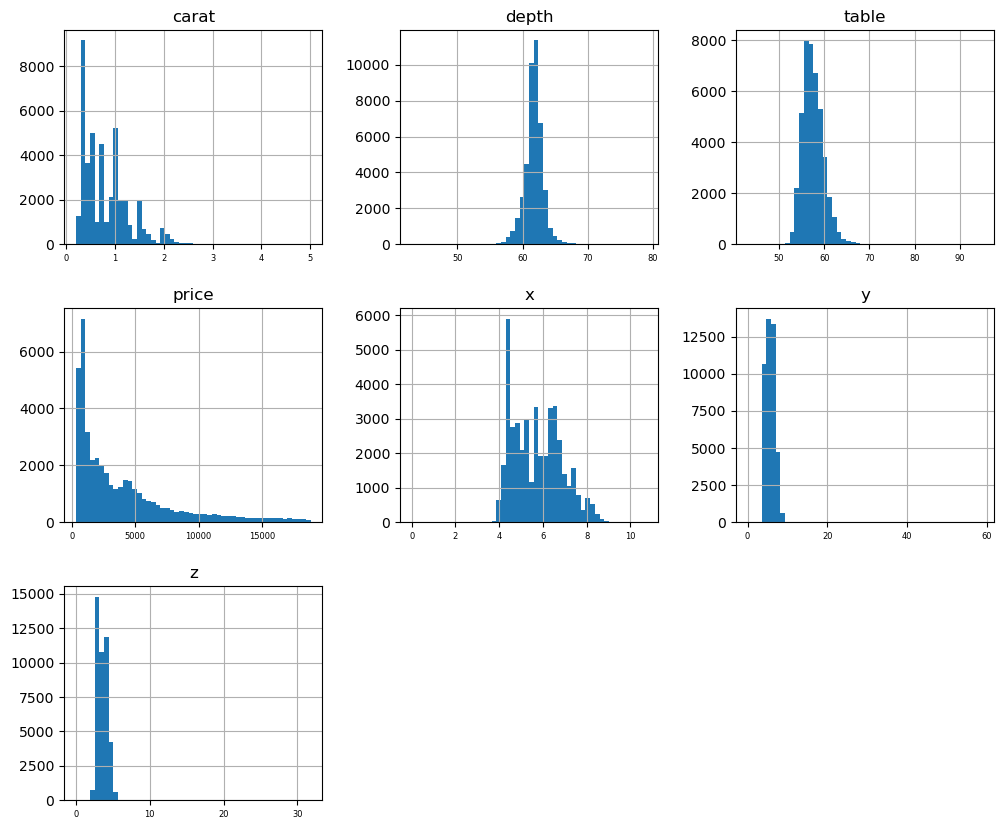

In [16]:
# plot histograms for numerical columns

unique.hist(figsize=(12,10), bins=50,xlabelsize=6);

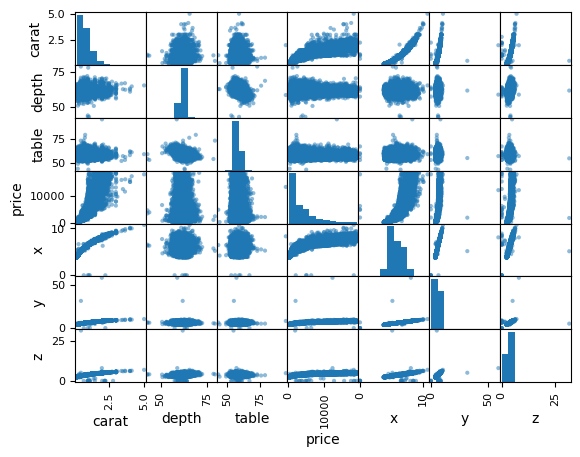

In [17]:
# Plot scatter matrix

from pandas.plotting import scatter_matrix

scatter_matrix(unique);

In [18]:
# it was noticed from the "describe" method that some values in x,y,z columns are 0. let's check them
xzero=unique[unique['x']==0]
yzero=unique[unique['y']==0]
zzero=unique[unique['z']==0]
print(len(xzero),len(yzero),len(zzero) )

5 4 17


In [19]:
print(len(zzero[zzero['x']==0]))
print(len(zzero[zzero['y']==0]))

5
4


It's not logic to have 0 value in the dimension column. let's replace 0 with another value. We can replace it with the median value.


In [20]:
stat=unique[['cut','color','clarity','x','y','z']]
stat.head(1)

,cut,color,clarity,x,y,z
Id,,,,,,
1,Ideal,I,SI2,6.57,6.6,4.07


In [21]:
# calculate the median value for columns x,y and z based on categorical columns
pvt=pd.pivot_table(data=stat,index='clarity',columns=['color','cut'],aggfunc='median',dropna=True)
pvt.head(1)

x                                                            \
color        D                                     E                       
cut       Fair   Good  Ideal Premium Very Good  Fair  Good Ideal Premium   
clarity                                                                    
I1       7.325  5.435  5.955    6.63      6.18  6.18  6.87  6.43    6.52   

                   ...    z                                                   \
color              ...    I                                   J                
cut     Very Good  ... Fair  Good Ideal Premium Very Good  Fair  Good  Ideal   
clarity            ...                                                         
I1          6.475  ...  4.3  4.02  3.98   4.345      4.91  5.12  3.88  4.875   

                           
color                      
cut     Premium Very Good  
clarity                    
I1         4.13     4.595  

[1 rows x 105 columns]

In [22]:
def replace_median(df, pvt, col):
    """Takes in a df, replaces 0 values with the median corresponding to categorical values of this obsrevation"""
    for index, row in df.iterrows():
        if row[col] == 0:
            clrty = row['clarity']
            cut = row['cut']
            color = row['color']
            median_val = pvt.loc[clrty, (col, color, cut)]
            df.at[index, col] = median_val
    return df

In [23]:
# now replace the zeros with medians,

unique=replace_median(unique,pvt,'x')
unique=replace_median(unique,pvt,'y')
unique=replace_median(unique,pvt,'z')
unique.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
Id,,,,,,,,,,
1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.6,4.07


In [24]:
# reset index
unique.reset_index(inplace=True)

In [25]:
unique.head(1)

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.6,4.07


In [26]:
# Let's change categorical columns to numerical using encoding, noting that both 'cut' and 'clarity' has ordinal data, 
# while 'color' has categorical data. We can use ordinal encoding on ordinal data and one hot encoding on categorical data.

# Let's split the dataset into 3 datasets. One categorical column "Color" and numerical columns, and apply encoding on categorical columns

categ=unique['color']
ordin=unique[['cut', 'clarity']]
numer=unique.drop(columns=['color', 'cut', 'clarity'],axis=1)

In [27]:
# define categories ordering, giving the best values highest numbers

cut = ['Fair', 'Good', 'Very Good', 'Premium','Ideal']

clar=  ['I1','SI2','SI1','VS2', 'VS1','VVS2','VVS1','IF']

tiers = [cut,clar]

In [28]:
# encode ordinal data

from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(categories=tiers)

In [29]:
encoded1 = enc.fit_transform(ordin)
enc_co=pd.DataFrame(encoded1,columns=ordin.columns)

In [30]:
# encode categorical column

from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder()

In [31]:
onehot = ohe.fit_transform(categ.values.reshape(-1, 1))

In [32]:
res=onehot.toarray()
res

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
ordin=pd.DataFrame(res,columns=ohe.get_feature_names_out())
ordin.head(2)

,x0_D,x0_E,x0_F,x0_G,x0_H,x0_I,x0_J
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [34]:
# Merge back all columns

df=pd.concat([numer,enc_co,ordin],axis=1)
df

,Id,carat,depth,table,price,x,y,z,cut,clarity,x0_D,x0_E,x0_F,x0_G,x0_H,x0_I,x0_J
0,1,1.06,61.8,57.0,4270,6.57,6.60,4.07,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,1.51,60.9,58.0,15164,7.38,7.42,4.51,3.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,0.32,61.3,56.0,828,4.43,4.41,2.71,4.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,0.53,61.2,56.0,1577,5.19,5.22,3.19,4.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,0.70,61.0,57.0,2596,5.76,5.72,3.50,3.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43050,43148,0.52,61.5,56.0,1760,5.16,5.18,3.18,4.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
43051,43149,0.72,62.1,59.0,3016,5.70,5.73,3.55,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
43052,43150,0.44,61.5,58.0,990,4.95,4.87,3.02,3.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43053,43151,0.31,60.2,58.0,734,4.38,4.43,2.65,3.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


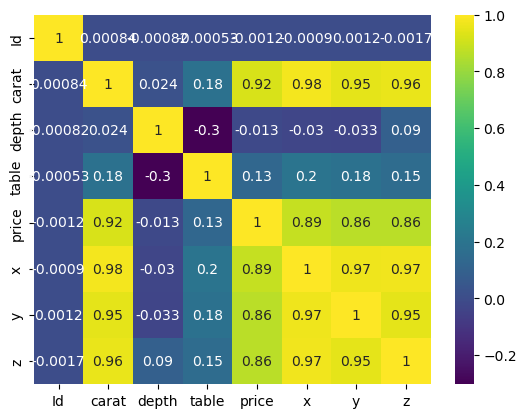

In [37]:
# plot heatmap for numerical columns

sns.heatmap(numer.corr(numeric_only=True),annot=True,cmap='viridis');

In [35]:
# Now we need to scale our data since there are variations in the range of values, let's use standardscalar

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()

# let's first drop the target column "Price"
df1=df.drop(['price'],axis=1)
df1.head()

,Id,carat,depth,table,x,y,z,cut,clarity,x0_D,x0_E,x0_F,x0_G,x0_H,x0_I,x0_J
0,1,1.06,61.8,57.0,6.57,6.60,4.07,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,1.51,60.9,58.0,7.38,7.42,4.51,3.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,0.32,61.3,56.0,4.43,4.41,2.71,4.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,0.53,61.2,56.0,5.19,5.22,3.19,4.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,0.70,61.0,57.0,5.76,5.72,3.50,3.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
# apply the scalar

df2 = scaler.fit_transform(df1)
df2

array([[-1.73070204,  0.55420965,  0.03736927, ..., -0.42659746,
         3.02010969, -0.2367953 ],
       [-1.73062177,  1.50519776, -0.58978672, ..., -0.42659746,
        -0.3311138 , -0.2367953 ],
       [-1.7305415 , -1.00963748, -0.31105073, ..., -0.42659746,
        -0.3311138 , -0.2367953 ],
       ...,
       [ 1.7330252 , -0.75604064, -0.17168273, ..., -0.42659746,
         3.02010969, -0.2367953 ],
       [ 1.73310547, -1.03077054, -1.07757471, ..., -0.42659746,
        -0.3311138 , -0.2367953 ],
       [ 1.73318574, -0.98850441, -0.38073472, ..., -0.42659746,
        -0.3311138 , -0.2367953 ]])

In [39]:
df3=pd.DataFrame(df2, columns=df1.columns)
df3

,Id,carat,depth,table,x,y,z,cut,clarity,x0_D,x0_E,x0_F,x0_G,x0_H,x0_I,x0_J
0,-1.730702,0.554210,0.037369,-0.205791,0.748611,0.753541,0.752223,0.982457,-1.240321,-0.379132,-0.470993,-0.463578,-0.515596,-0.426597,3.020110,-0.236795
1,-1.730622,1.505198,-0.589787,0.241777,1.472450,1.468412,1.376808,0.085517,1.185197,-0.379132,-0.470993,-0.463578,1.939502,-0.426597,-0.331114,-0.236795
2,-1.730541,-1.009637,-0.311051,-0.653358,-1.163751,-1.155687,-1.178313,0.982457,-0.027562,-0.379132,-0.470993,2.157135,-0.515596,-0.426597,-0.331114,-0.236795
3,-1.730461,-0.565843,-0.380735,-0.653358,-0.484594,-0.449534,-0.496948,0.982457,-0.027562,-0.379132,-0.470993,-0.463578,1.939502,-0.426597,-0.331114,-0.236795
4,-1.730381,-0.206581,-0.520103,-0.205791,0.024773,-0.013637,-0.056899,0.085517,1.185197,-0.379132,-0.470993,-0.463578,-0.515596,2.344130,-0.331114,-0.236795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43050,1.732865,-0.586976,-0.171683,-0.653358,-0.511403,-0.484406,-0.511143,0.982457,-0.027562,-0.379132,2.123174,-0.463578,-0.515596,-0.426597,-0.331114,-0.236795
43051,1.732945,-0.164315,0.246421,0.689345,-0.028844,-0.004919,0.014077,-0.811423,-0.027562,2.637601,-0.470993,-0.463578,-0.515596,-0.426597,-0.331114,-0.236795
43052,1.733025,-0.756041,-0.171683,0.241777,-0.699065,-0.754662,-0.738265,0.085517,1.791576,-0.379132,-0.470993,-0.463578,-0.515596,-0.426597,3.020110,-0.236795
43053,1.733105,-1.030771,-1.077575,0.241777,-1.208433,-1.138251,-1.263484,0.085517,0.578817,-0.379132,2.123174,-0.463578,-0.515596,-0.426597,-0.331114,-0.236795


In [40]:
# Now our data is ready for modelling
# split into training and testing sets

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def train(data,model):
    """Takes a dataset, a model, and then splits the data, trains the model, returns accuracy"""
    X_train, X_test, y_train, y_test = train_test_split(data, unique['price'], test_size=0.2, random_state=42)
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    final_rmse = mean_squared_error(y_test, ypred, squared=False)
    return final_rmse

In [41]:
# Use Random forrest regressor

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [42]:
# Check random forrest accuracy

train(df3,forest_reg)

556.6700106809546

Since we are using a tree-based model, we can try skipping the Scaling step

In [43]:
# Check random forrest accuracy

train(df1,forest_reg)

553.813066639809

In [44]:
# try xgb model

from xgboost import XGBRegressor

xgb = XGBRegressor()

train(df1,xgb) # use data before scaling

553.3064142961549

In [45]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

train(df3,xgb) # use scaled data

553.3064142961549

In [46]:
# Try linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

train(df3,lr)

1195.4998618934105

So far, tree based models performs better. XGB is performing slightly better than random forest

In [47]:
# Let's try some more modifications to the dataset
# first, let's avoid using ordinal encoder, and use onehot encoder for all categorical columns

data2=unique.copy()
data2.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [48]:
categ2=data2[['cut', 'clarity', 'color']]

ohe2=OneHotEncoder()
onehot2 = ohe2.fit_transform(categ2)

In [49]:
res2=onehot2.toarray()
res2

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [50]:
categoric=pd.DataFrame(res2,columns=ohe2.get_feature_names_out())
categoric.head(2)

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [51]:
# Merge back all columns

categor=pd.concat([numer,categoric],axis=1)
categor.tail(2)

,Id,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,...,clarity_VS2,clarity_VVS1,clarity_VVS2,color_D,color_E,color_F,color_G,color_H,color_I,color_J
43053,43151,0.31,60.2,58.0,734,4.38,4.43,2.65,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
43054,43152,0.33,61.2,55.0,743,4.49,4.46,2.74,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [52]:
categor.drop(columns='price', inplace=True, axis=1)

In [53]:
# Check random forrest accuracy

train(categor,forest_reg)

563.8394707569578

In [54]:
# Check xgb accuracy

train(categor,xgb)

558.2700455849841

It seems that onehot encoding increased the error, we can skip this step and use the ordinal encoder.


In [55]:
# Since we have x,y and z, we can calculate the size of each diamond by multiplying the 3 columns and then droppig them and 
# using the size instead

szdf=df1.copy()

In [56]:
szdf['size']=szdf['x']*szdf['y']*szdf['z']
szdf.head(2)

,Id,carat,depth,table,x,y,z,cut,clarity,x0_D,x0_E,x0_F,x0_G,x0_H,x0_I,x0_J,size
0,1,1.06,61.8,57.0,6.57,6.60,4.07,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,176.483340
1,2,1.51,60.9,58.0,7.38,7.42,4.51,3.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,246.965796


In [57]:
szdf.drop(columns=['x','y','z'], axis=1,inplace=True)
szdf.head(2)

,Id,carat,depth,table,cut,clarity,x0_D,x0_E,x0_F,x0_G,x0_H,x0_I,x0_J,size
0,1,1.06,61.8,57.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,176.483340
1,2,1.51,60.9,58.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,246.965796


In [58]:
train(szdf,xgb)

557.4710780064502

This merge increased the error, so far, the best model is the one with ordinal encoding.

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df1, unique['price'], test_size=0.2, random_state=42)
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
f_rmse = mean_squared_error(y_test, y_pred, squared=False)
f_rmse

553.3064142961549

In [61]:
import warnings
warnings.filterwarnings("ignore")

In [76]:
# Let's use gridsearch to tune our parameters

from sklearn.model_selection import GridSearchCV
param_grid ={'max_depth': [3,4,5],
             'learning_rate': [0.05, 0.07,1],
            'n_estimators': [400,500]}

grid_search = GridSearchCV(xgb, param_grid, cv=3,scoring='neg_root_mean_squared_error')

grid_search.fit(df1, unique['price'])

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.07, 1],
                         'max_depth': [3, 4, 5], 'n_estimators': [400, 500]},
             scoring='neg_root_mean_squared_error')

In [77]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 400}

In [78]:
grid_search.best_score_

-557.3478428505244

In [79]:
# let's follow the same pre-processing steps on the test data and retrieve predictions

# Use ordinal encoding

tord=enc.transform(test[['cut', 'clarity']])
enc_t=pd.DataFrame(tord,columns=['cut', 'clarity'])
enc_t.head(2)

,cut,clarity
0,4.0,5.0
1,3.0,3.0


In [80]:
# use one hot encoder
onehot_t=ohe.transform(test['color'].values.reshape(-1, 1))
res_t=onehot_t.toarray()
res_t

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [81]:
cat_t=pd.DataFrame(res_t, columns=ohe.get_feature_names_out())
cat_t.head(2)

,x0_D,x0_E,x0_F,x0_G,x0_H,x0_I,x0_J
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [82]:
tnum=numer.columns.drop(['price','Id'])
tnum

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [83]:
# merge back all columns

test_fin=pd.concat([test[tnum].reset_index(),cat_t,enc_t],axis=1)
test_fin.tail()

,Id,carat,depth,table,x,y,z,x0_D,x0_E,x0_F,x0_G,x0_H,x0_I,x0_J,cut,clarity
10783,10784,0.57,60.9,56.0,5.34,5.36,3.26,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,4.0
10784,10785,1.05,60.8,57.0,6.65,6.58,4.02,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,3.0
10785,10786,0.71,62.3,55.0,5.68,5.72,3.55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0
10786,10787,1.11,61.0,60.0,6.68,6.66,4.07,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
10787,10788,2.00,61.5,59.0,8.03,7.95,4.92,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0


In [84]:
# Let's predict prices of test data

subm=xgb.predict(test_fin[df1.columns])
len(subm)

10788

In [85]:
# take a copy to add a column for price predictions
test_fin2=test_fin.copy()

In [92]:
test_fin2['price']=subm

test_fin2.head(1)

,Id,carat,depth,table,x,y,z,x0_D,x0_E,x0_F,x0_G,x0_H,x0_I,x0_J,cut,clarity,price
0,1,0.34,61.1,57.0,4.52,4.48,2.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,5.0,876.372803


In [90]:
# Let' select the submission columns

final2=test_fin2[['Id','price']]
final2.set_index('Id', inplace=True)
final2.head(2)

,price
Id,
1,876.372803
2,2880.730713


In [91]:
# save to csv
final2.to_csv('final.csv')

### Thank you